In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense

In [50]:
df = pd.read_csv('./bankloan.csv') 
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size


Counter({'N': 148, 'Y': 332})

In [51]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_x)
dm_y = pre_y.map(dict(Y=1, N=0))
pre_x


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban


In [52]:
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [53]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [54]:
smote = SMOTE(sampling_strategy='minority')
X1,y = smote.fit_sample(dm_X, dm_y)
sc = MinMaxScaler()
X= sc.fit_transform(X1)

In [55]:
Counter(y)

Counter({0: 332, 1: 332})

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)


In [57]:
classifier= Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=50,verbose=0)

In [58]:
eval_model=classifier.evaluate(X_train,y_train)

17/17 [==============================] - 0s 1ms/step - loss: 0.2765 - accuracy: 0.8889


In [59]:
eval_model

[0.2764837145805359, 0.8888888955116272]

In [60]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [61]:
from sklearn.metrics import confusion_matrix

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

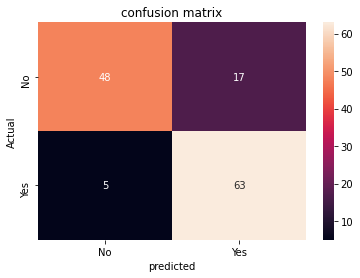

In [62]:
confusion_matrix(y_test, y_pred)
cm=confusion_matrix(y_test,y_pred)
ax = plt.subplot()
from seaborn.matrix import heatmap
sns.heatmap(cm, annot=True , ax=ax) #annot true to anotate cells
#labes titles an ticks
ax.set_xlabel('predicted');ax.set_ylabel('Actual')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes'])

In [65]:
import pickle

In [67]:
#from sklearn.externals import joblib
import joblib

In [75]:
from multiprocessing import Queue

In [83]:
#filename='loan_model.pkl'
#joblib.dump(classifier, filename)

#filename = 'finalized_model.sav'
#pickle.dump(classifier, open(filename, 'wb'))
